In [106]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [107]:
batch_size = 64
img_height = 48
img_width = 48

In [108]:
train_dir = 'fer2013/train'
test_dir = 'fer2013/test'

In [109]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [110]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [111]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


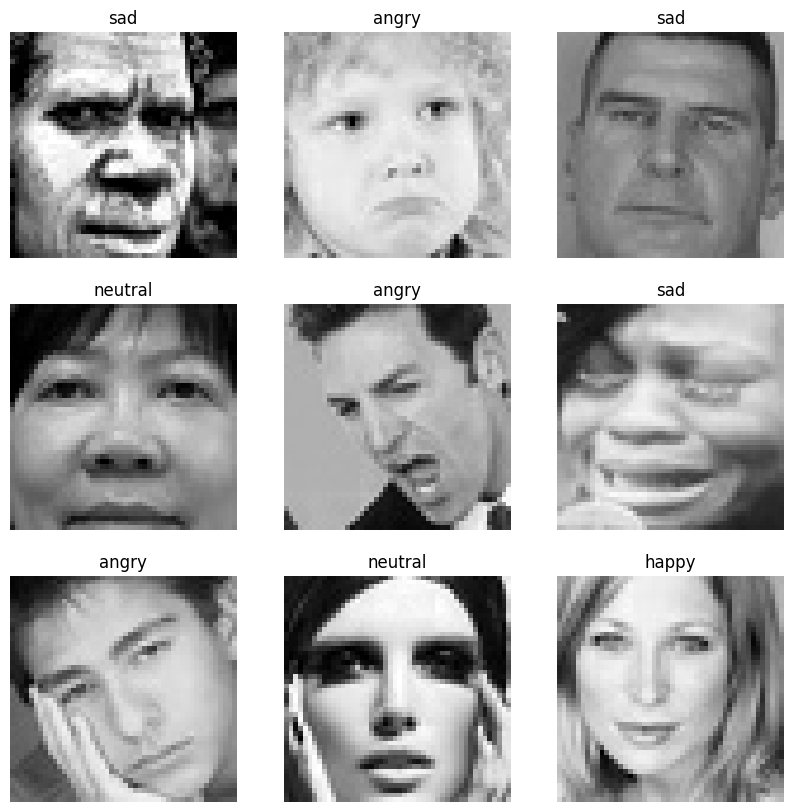

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [113]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [114]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.06666667 0.86274517


In [115]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [122]:
num_classes = 7

model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(64, 3, activation='sigmoid'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [123]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [124]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
359/359 [==============================] - 19s 51ms/step - loss: 2.8011 - accuracy: 0.2406 - val_loss: 1.8833 - val_accuracy: 0.2453
Epoch 2/30
359/359 [==============================] - 19s 53ms/step - loss: 1.8634 - accuracy: 0.2528 - val_loss: 1.8510 - val_accuracy: 0.2453
Epoch 3/30
359/359 [==============================] - 19s 53ms/step - loss: 1.8394 - accuracy: 0.2528 - val_loss: 1.8356 - val_accuracy: 0.2453
Epoch 4/30
359/359 [==============================] - 19s 54ms/step - loss: 1.8272 - accuracy: 0.2528 - val_loss: 1.8273 - val_accuracy: 0.2453
Epoch 5/30
268/359 [=====================>........] - ETA: 4s - loss: 1.8210 - accuracy: 0.2518

KeyboardInterrupt: 

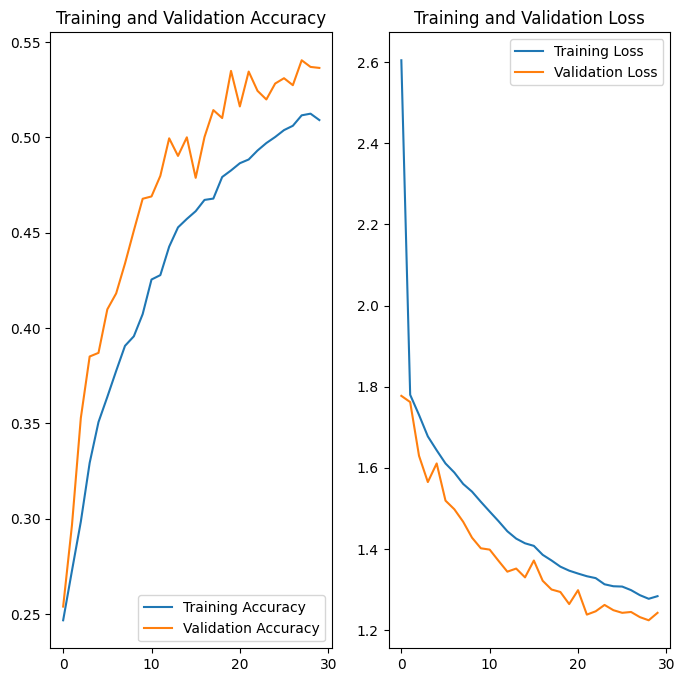

In [81]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [82]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7177 files belonging to 7 classes.


In [83]:
predictions = model.predict(test_ds)

113/113 [==============================] - 10s 88ms/step


In [84]:
test_loss, test_acc = model.evaluate(test_ds)

113/113 [==============================] - 11s 93ms/step - loss: 1.2306 - accuracy: 0.5309


In [85]:
print(test_loss,test_acc)

1.2306408882141113 0.5308624505996704


In [87]:
model.save('nn_model_all.h5')

/Users/harshdalwadi/Desktop/Facial Expresion/env/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
model.save('my_model.keras')

NameError: name 'model' is not defined

In [78]:
import cv2

In [97]:
image = cv2.imread('example4.jpg')

In [98]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [99]:
resized_image = cv2.resize(image, (48, 48))
resized_image = np.expand_dims(resized_image, axis=0)

In [100]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(48, 48, 3)))

normalized_image = model.predict(resized_image)

1/1 [==============================] - 0s 15ms/step


In [101]:
from keras.models import load_model
loaded_nn_model = load_model('nn_model_all.h5')

In [102]:
y_predict=loaded_nn_model.predict(normalized_image)

1/1 [==============================] - 0s 40ms/step


In [103]:
print(y_predict)

[[ 0.5830776  -1.0299599   0.48050013  0.32342052  0.50754213  0.9846958
  -0.9884002 ]]


In [104]:
res = np.argmax(y_predict[0])

In [105]:
print('predicted Label for that image is: {}'.format(class_names[res]))

predicted Label for that image is: sad


In [1]:
import cv2

# Load the face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Create a video capture object
cap = cv2.VideoCapture(0)

# Loop until the user presses the Esc key
while True:

    # Capture a frame from the webcam
    ret, frame = cap.read()
    frame = cv2.flip(frame,1)
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Draw a bounding box around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('frame', frame)

    # Wait for a key press
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Release the video capture object
cap.release()

# Close all windows
cv2.destroyAllWindows()

2023-12-06 11:58:33.729 Python[2885:74263] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.
